# **WEEKLY DATA ANALYSIS CHALLANGE 21**

**Extracting the dataset**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('ds_salaries.csv')
ds

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


**CLEANING AND TRANSFORMATION**

1. Is there any missing values?

In [3]:
ds.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
count_nan = ds.isna().sum().sum()
print(f'Number of missing values: {count_nan}')

Number of missing values: 0


2. Are the data types in each columns correct?

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


3. Remove and rename unnecessary columns

In [6]:
rename = {
    'Unnamed: 0':'employee_id'
}

ds = ds.rename(columns=rename)

In [7]:
ds = ds.drop(['salary_currency', 'salary'], axis=1)
ds.head()

,employee_id,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


**VISUALISATION**

1. Which role has the highest salary employment wise?

In [8]:
salary_pivot = ds.pivot_table(index='job_title', values='salary_in_usd', aggfunc='mean')
sorted_salary = salary_pivot.sort_values(by='salary_in_usd', ascending=False).round(0).astype(int)
sorted_salary

,salary_in_usd
job_title,
Data Analytics Lead,405000
Principal Data Engineer,328333
Financial Data Analyst,275000
Principal Data Scientist,215242
Director of Data Science,195074
Data Architect,177874
Applied Data Scientist,175655
Analytics Engineer,175000
Data Specialist,165000


2. Which employment types do employers prefer to hire

In [9]:
ep_type = ds.pivot_table(index='employment_type', values='employee_id', aggfunc='count')
sorted_epType = ep_type.sort_values(by='employee_id', ascending=False)
sorted_epType

,employee_id
employment_type,
FT,588
PT,10
CT,5
FL,4


3. Which role are entry leveled generally hired for?

In [10]:
entry_level = ds[ds['experience_level'] == 'EN']
count = entry_level['job_title'].value_counts()
count

Data Scientist                        22
Data Analyst                          12
Data Engineer                         12
Machine Learning Engineer              9
Data Science Consultant                5
AI Scientist                           4
Research Scientist                     4
Big Data Engineer                      3
Computer Vision Engineer               3
Business Data Analyst                  2
ML Engineer                            2
Computer Vision Software Engineer      2
BI Data Analyst                        2
Machine Learning Scientist             1
Applied Data Scientist                 1
Machine Learning Developer             1
Financial Data Analyst                 1
Applied Machine Learning Scientist     1
Data Analytics Engineer                1
Name: job_title, dtype: int64

4. Which countries pay the highest for which role?

In [11]:
grouped = ds.groupby('job_title')['salary_in_usd'].max()
result = ds.groupby(['job_title', 'salary_in_usd'])['company_location'].first().reset_index()
result = result.sort_values('salary_in_usd', ascending=False)
result

,job_title,salary_in_usd,company_location
472,Principal Data Engineer,600000,US
387,Financial Data Analyst,450000,US
497,Research Scientist,450000,US
19,Applied Machine Learning Scientist,423000,US
479,Principal Data Scientist,416000,US
...,...,...,...
268,Data Scientist,5679,US
0,3D Computer Vision Researcher,5409,IN
267,Data Scientist,4000,VN
138,Data Engineer,4000,IR


5. what insight can you find regaurding employees demographic?

In [12]:
# employees location count

location_count = ds['employee_residence'].value_counts()
location_count

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

In [13]:
# employees remote ratio count

ratio_count = ds['remote_ratio'].value_counts()
ratio_count

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

6. Which experinece level has the highest hiring?

In [14]:
experience_count = ds['experience_level'].value_counts()
experience_count

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

7. Does company size affect the rate of hiring and pay scale

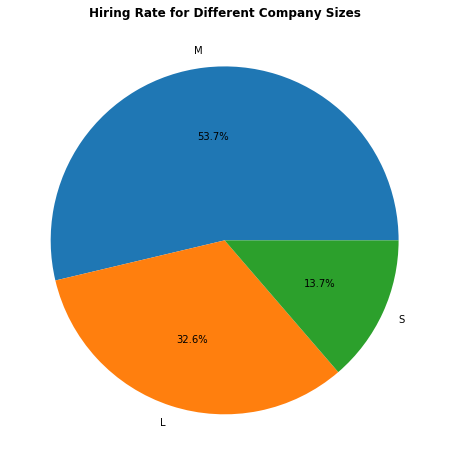

In [15]:
# hiring rate distribution by company size

company_size = ds['company_size'].value_counts()
company_size

fig = plt.figure(figsize=(10, 8))
plt.pie(company_size, labels=company_size.index, autopct='%1.1f%%')
plt.title('Hiring Rate for Different Company Sizes', weight='bold')
plt.show()

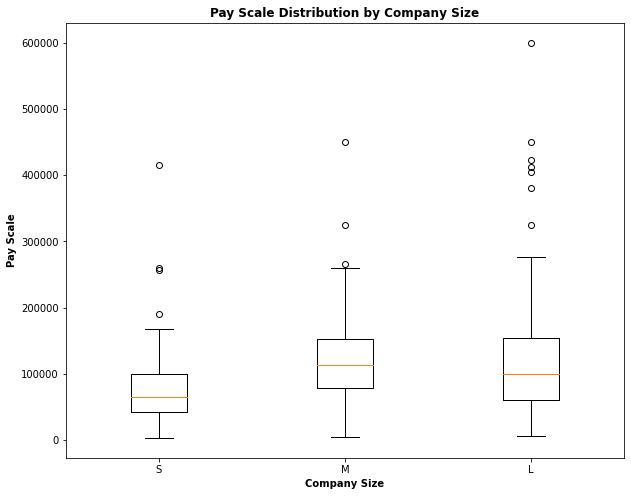

In [16]:
# Pay scale in different company sizes

data = {
    'Comapny Size' : ds['company_size'],
    'Salary' : ds['salary_in_usd']
}
pay_scale = pd.DataFrame(data)

fig = plt.figure(figsize=(10,8))
box_plot = plt.boxplot(
    [
    pay_scale[pay_scale['Comapny Size'] == 'S']['Salary'],
    pay_scale[pay_scale['Comapny Size'] == 'M']['Salary'],
    pay_scale[pay_scale['Comapny Size'] == 'L']['Salary']
    ], 
    labels=['S', 'M', 'L'],
)

plt.title('Pay Scale Distribution by Company Size', weight='bold')
plt.xlabel('Company Size', weight='bold')
plt.ylabel('Pay Scale', weight='bold')
plt.show()

9. What is the Year over Year salary growth at different levels?

<Figure size 720x576 with 0 Axes>

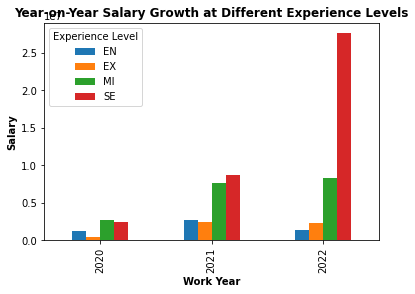

In [20]:
data = {
    'Work Year': ds['work_year'],
    'Experience Level': ds['experience_level'],
    'Salary': ds['salary_in_usd']
}
YoY = pd.DataFrame(data)

grouped_data = YoY.groupby(['Work Year', 'Experience Level']).sum().reset_index()
pivoted_data = grouped_data.pivot(index='Work Year', columns='Experience Level', values='Salary')

plt.figure(figsize=(10,8))
pivoted_data.plot(kind='bar')
    
plt.xlabel('Work Year', weight='bold')
plt.ylabel('Salary', weight='bold')
plt.title('Year-on-Year Salary Growth at Different Experience Levels', weight='bold')

plt.show()